In [1]:
# setup environment
import pandas as pd
import numpy as np
import scipy as sp
import wquantiles
from statsmodels import robust

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # I like seaborn default theme

import warnings
warnings.filterwarnings("ignore")

input_path = './data/'

# 1 Exploratory Data Analysis
## 1.1 Elements of Structured Data

One of the commonest forms of **structured data** is a **table** with rows and columns.

#### <p style="text-align: center;">Key Terms for Data Types</p>

- ***Numeric***  
    Data that are expressed on a numeric scale.
    - ***Continuous***  
    Data that can take on any value in an interval. (Synonyms: interval, float, numeric)
    - ***Discrete***  
    Data that can take on only integer values, such as counts. (Synonyms: integer, count)
- ***Categorical***  
    Data that can take on only a specific set of values representing a set of possible categories. (Synonyms: enums, enumerated, factors, nominal)
    - ***Binary***  
    A special case of categorical data with just two categories of values, e.g., 0/1, true/false. (Synonyms: dichotomous, logical, indicator, boolean)
    - ***Ordinal***  
    Categorical data that has an explicit ordering. (Synonym: ordered factor)
    
#### <p style="text-align: center;">Key Ideas</p>

- Data is typically classified in software by type.
- Data types include numeric (continuous, discrete) and categorical (binary, ordinal).
- Data typing in software acts as a signal to the software on how to process the data.

**Example**  
- Text string can be stored as 'object' or 'category' datatype in `pandas`, they look the same in table, but actually have big differences:
    - Different storage efficiency. `category` datatype only need to store its code in each data row, no need to store the string repeatedly.
    - Different process. Once all categories are defined, you cannot add another string which is not inside the categories.
    - Different sorting method. 'object' sort by alphabetic order, but 'category' sort by the category code.
    - Different order when plotting by `seaborn`. 'object' will be plotted in the order of their appearence in dataset, but 'category' will be plotted in code number sequence.

## 1.2 Rectangular Data

Data science mostly work on rectangular data. Unstructured data (e.g., text) must be processed and manipulated so that it can be represented as a set of features in the rectangular table form. Data in relational databases must be extracted and put into a single table for most data analysis and modeling tasks.

#### <p style="text-align: center;">Key Terms for Rectangular Data</p>

- ***Data frame***  
Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models.  
<br>
- ***Feature***  
A column within a table is commonly referred to as a *feature*.  
<br>
*Synonyms*
    - attribute, input, predictor, variable  
    <br>
- ***Outcome***  
Many data science projects involve predicting an outcome—often a yes/no out‐
come. The features are sometimes used to predict the outcome in an experiment or a study.  
<br>
*Synonyms*
    - dependent variable, response, target, output  
    <br>
- ***Records***  
A row within a table is commonly referred to as a *record*.  
<br>
*Synonyms*
    - case, example, instance, observation, pattern, sample

### 1.2.1 Data Frames and Indexes

In *Python*, `pandas` library is widely used to store and process data in basic rectangular structure called `DataFrame` object. By default, an automatic integer index is created for a DataFrame based on the order of the rows, but it is also possible to set multilevel/hierarchical indexes to improve the efficiency of certain operations.

**<span style="color:red">Terminology Differences</span>**

- Terminology for rectangular data can be confusing.
- Statisticians and data scientists use different terms for the same thing.
    - For a **statistician**, *predictor variables* are used in a model to predict a *response* or *dependent variable*.
    - For a **data scientist**, *features* are used to predict a *target*.
- One synonym is particularly confusing:
    - **Computer scientists** will use the term *sample* for a single row
    - A *sample* to a **statistician** means a collection of rows.

### 1.2.2 Nonrectangular Data Structures

There are other data structures besides rectangular data:  
- **Time series data** records successive measurements of the same variable.
- **Spatial data structures**, which are used in mapping and location analytics.
- **Graph (or network) data structures** are used to represent physical, social, and abstract relationships.

**<span style="color:red">Terminology Differences</span>**  
- In **computer science and information technology**, the term *graph* typically refers to a depiction of the connections among entities, and to the underlying data structure.
- In **statistics**, *graph* is used to refer to a variety of plots and visualizations, not just of connections among entities, and the term applies only to the visualization, not to the data structure.

## 1.3 Estimates of Location

#### <p style="text-align: center;">Key Terms for Estimates of Location</p>
- ***Mean***  
The sum of all values divided by the number of values.  
<br>
*Synonym*
    - average
- ***Weighted mean***  
The sum of all values times a weight divided by the sum of the weights.  
<br>
*Synonym*
    - weighted average
- ***Median***  
The value such that one-half of the data lies above and below.  
<br>
*Synonym*
    - 50th percentile
- ***Percentile***  
The value such that *P* percent of the data lies below.  
<br>
*Synonym*
    - quantile
- ***Weighted median***  
The value such that one-half of the sum of the weights lies above and below the sorted data.  
<br>
- ***Trimmed mean***  
The average of all values after dropping a fixed number of extreme values.  
<br>
*Synonym*
    - truncated mean
- ***Robust***  
Not sensitive to extreme values.  
E.g., *Median* and *trimmed mean* are more robust than *mean*.  
<br>
*Synonym*
    - resistant
- ***Outlier***  
A data value that is very different from most of the data.  
<br>
*Synonym*
    - extreme value

**Metrics and Estimates**  
- Statisticians often use the term *estimate* for a value calculated from the data at hand, to draw a distinction between what we see from the data and the theoretical true or exact state of affairs.
- Data scientists and business analysts are more likely to refer to such a value as a *metric*.

**Anomaly Detection**  
- In contrast to typical data analysis, where outliers are sometimes informative and sometimes a nuisance, in *anomaly detection* the points of interest are the outliers, and the greater mass of data serves primarily to define the “normal” against which anomalies are measured.

In [2]:
state = pd.read_csv(input_path + 'state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Above shows the first few rows in the data set containing population and murder rates (in units of murders per 100,000 people per year) for each US state (2010 Census).

Let's calculate the mean, trimmed mean, and median for the population. To compute mean and median in *Python* we can use the `pandas` methods of the data frame. The trimmed mean requires the `trim_mean` function in `scipy.stats`:

In [3]:
print('Location estimates of Population:')
print(f'       mean = {state.Population.mean():,.2f}')
print(f'  trim_mean = {sp.stats.trim_mean(state.Population, 0.1):,.2f}') # drop 10% from each end
print(f'     median = {state.Population.median():,.2f}')

Location estimates of Population:
       mean = 6,162,876.30
  trim_mean = 4,783,697.12
     median = 4,436,369.50


Now let's calculate the weighted (on population) mean and median of murder rate. Weighted mean is available with `NumPy`. For weighted median, we can use the specialized package `wquantiles`:

In [4]:
mean_w = np.average(state['Murder.Rate'], 
                    weights=state['Population'])
median_w = wquantiles.median(state['Murder.Rate'], 
                             weights=state['Population'])
print(f'Weighted mean   = {mean_w}')
print(f'Weighted median = {median_w}')

Weighted mean   = 4.445833981123393
Weighted median = 4.4


## 1.4 Estimates of Variability

Location is just one dimension in summarizing a feature. A second dimension, *variability*, also referred to as *dispersion*, measures whether the data values are tightly clustered or spread out.

#### <p style="text-align: center;">Key Terms for Variability Metrics</p>

- ***Deviations***  
The difference between the observed values and the estimate of location.  
<br>
*Synonyms*
    - errors, residuals
- ***Variance***  
The sum of squared deviations from the mean divided by $n – 1$ where $n$ is the number of data values.  
<br>
*Synonyms*
    - mean-squared-error
- ***Standard deviation***  
The square root of the variance.  
<br>
- ***Mean absolute deviation***  
The mean of the absolute values of the deviations from the mean.  
<br>
*Synonyms*
    - l1-norm, Manhattan norm
- ***Median absolute deviation from the median***  
The median of the absolute values of the deviations from the median.  
<br>
- ***Range***  
The difference between the largest and the smallest value in a data set.  
<br>
- ***Order statistics***  
Metrics based on the data values sorted from smallest to biggest.  
<br>
*Synonyms*
    - ranks
- ***Percentile***  
The value such that P percent of the values take on this value or less and (100–P)
percent take on this value or more.  
<br>
*Synonyms*
    - quantile
- ***Interquartile range***  
The difference between the 75th percentile and the 25th percentile.  
<br>
*Synonyms*
    - IQR

Neither the variance, the standard deviation, nor the mean absolute deviation is robust to outliers and extreme values.

A robust estimate of variability is the *median absolute deviation from the median* or MAD:  
$$\text{Median absolute deviation}=\text{Median}\left( \left| x_1-m \right|,\left| x_2-m \right|,\dots,\left| x_n-m \right| \right)$$  
where $m$ is the median. Like the median, the MAD is not influenced by extreme values. It is also possible to compute a trimmed standard deviation analogous to the trimmed mean.

Sometimes, the median absolute deviation is multiplied by a constant scaling factor to put the MAD on the same scale as the standard deviation in the case of a normal distribution. The commonly used factor of 1.4826 means that 50% of the normal distribution fall within the range ±MAD.

In [5]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Let's use above data again to calculate the standard deviation, IQR and MAD for the state populatoin data. `pandas` provides methods for calculating standard deviation and quantiles. For MAD, we use the function `robust.scale.mad` from the `statsmodels` package.

**<span style="color:red">NOTE</span>** `pandas` has MAD method, but it is ***mean*** absolute deviation instead of ***median*** absolute deviation.

In [6]:
print('Standard deviation = {:,.2f}'.format(
    state['Population'].std()
))
print('               IQR = {:,.2f}'.format(
    state['Population'].quantile(.75) - state['Population'].quantile(.25)
))
print('               MAD = {:,.2f}'.format(
    robust.scale.mad(state['Population'])
))

Standard deviation = 6,848,235.35
               IQR = 4,847,308.00
               MAD = 3,849,876.15


## 1.5 Exploring the Data Distribution

#### <p style="text-align: center;">Key Terms for Exploring the Distribution</p>

- ***Boxplot***  
A plot introduced by Tukey as a quick way to visualize the distribution of data.  
<br>
*Synonym*
    - box and whiskers plot
- ***Frequency table***  
A tally of the count of numeric data values that fall into a set of intervals (bins).  
<br>
- ***Histogram***  
A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis. While visually similar, bar charts should not be confused with histograms.  
<br>
- ***Density plot***  
A smoothed version of the histogram, often based on a *kernel density estimate*.

### 1.5.1 Percentiles and Boxplots

In [7]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

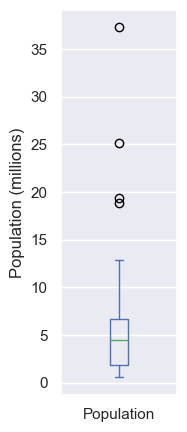

In [8]:
fig = plt.figure(figsize=(1.5,5))
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')
ax.grid(axis='x')
plt.show()

Interpret boxplot:  
- **Horizontal line in the box**: *median*
- **Top and bottom of the box**: *75th* and *25th percentiles*
- **Box length**: *IQR*
- **Whiskers**: extend (max 1.5 times IQR) from the top and bottom of the box to indicate the range for the bulk of the data
- **Markers (circles)**: *outliers*

### 1.5.2 Frequency Tables and Histograms

In [9]:
# pandas.cut creates a series that maps the values into the segments
binnedPopulation = pd.cut(state['Population'], 10) # 10 bins
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

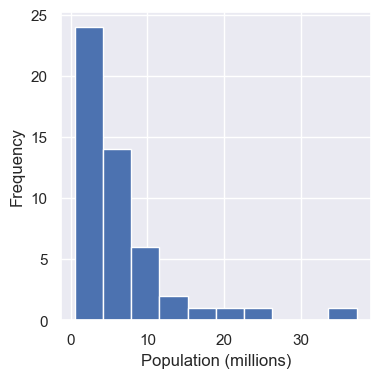

In [10]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')
plt.show()

In general, histograms are:  
- Empty bins are included in the graph.
- Bins are of equal width.
- The number of bins (or, equivalently, bin size) is up to the user.
- Bars are contiguous—no empty space shows between bars, unless there is an empty bin.

**Statistical Moments**  
- In statistical theory, location and variability are referred to as the first and second *moments* of a distribution.
- The third and fourth moments are called *skewness* and *kurtosis*.
    - Skewness refers to whether the data is skewed to larger (positive skewness) or smaller (negative skewness) values.
    - Kurtosis indicates the propensity of the data to have extreme values (when kurtosis > 3).
- Generally, metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays

### 1.5.3 Density Plots and Estimates

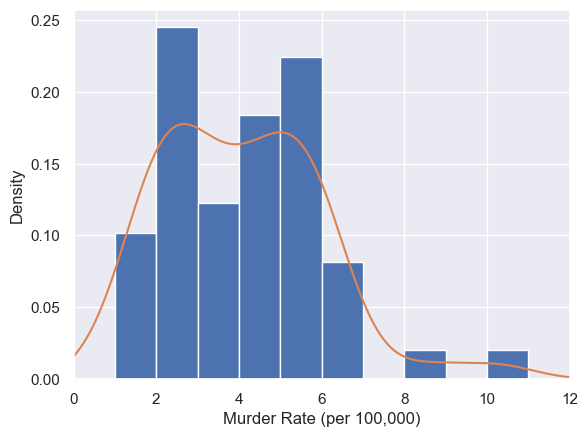

In [11]:
ax = state['Murder.Rate'].plot.\
    hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show()

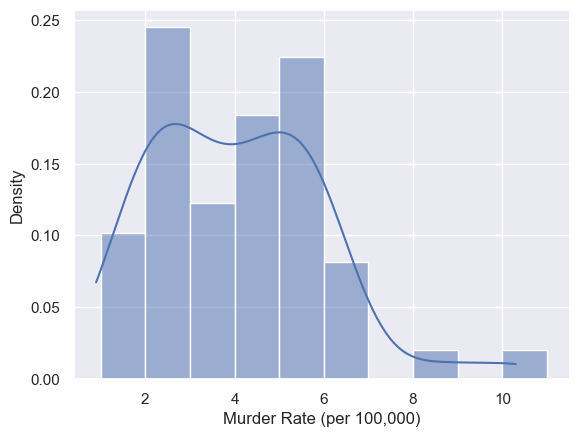

In [12]:
# I prefer to use seaborn
sns.histplot(data=state, x='Murder.Rate', 
             bins=range(1,12), kde=True, stat='density')
plt.xlabel('Murder Rate (per 100,000)')
plt.show()

**Density Estimation**  
- There are many different ways (kernel methods) to estimate density, you can find their implementations in `pandas` and `scikit-learn`. For many data science problems, there is no need to worry about the various types of density estimates; it suffices to use the default functions.

## 1.6 Exploring Binary and Categorical Data

#### <p style="text-align: center;">Key Terms for Exploring Categorical Data</p>

- ***Mode***  
The most commonly occurring category or value in a data set.  
<br>
- ***Expected value***  
When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.  
<br>
- ***Bar charts***  
The frequency or proportion for each category plotted as bars.  
<br>
- ***Pie charts***  
The frequency or proportion for each category plotted as wedges in a pie.

In [13]:
dfw = pd.read_csv(input_path + 'dfw_airline.csv')
dfw / dfw.sum(axis=1)[0] *100

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


Above table shows the percentage of delayed flights by the cause of delay at Dallas/Fort Worth Airport since 2010. Below is the barplot showing the airport delays per year by cause for Dallas/Fort Worth (DFW).

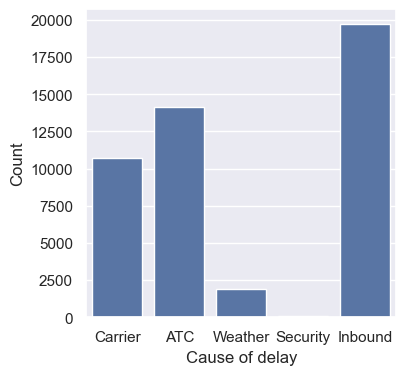

In [14]:
fig = plt.figure(figsize=(4,4))
sns.barplot(x=dfw.columns, y=dfw.loc[0]/6) # 6 years total count
plt.xlabel('Cause of delay')
plt.ylabel('Count')
plt.show()

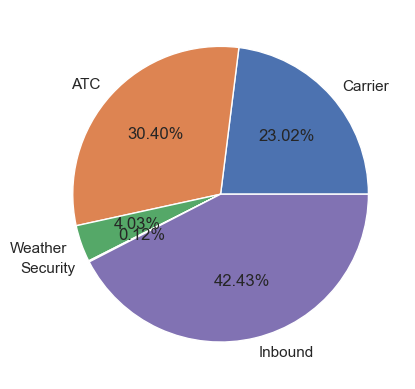

In [15]:
plt.pie(dfw.loc[0]/6, labels=dfw.columns, autopct='%.2f%%')
plt.show()

Pie charts are an alternative to bar charts, although statisticians and data visualization experts generally eschew pie charts as less visually informative.

## 1.7 Correlation

#### <p style="text-align: center;">Key Terms for Correlation</p>

- ***Correlation coefficient***  
A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).  
<br>
- ***Correlation matrix***  
A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.  
<br>
- ***Scatterplot***  
A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

*Person's correlation coefficient*  
$$r=\frac{\sum_{i=1}^{n}(x_i-\bar x)(y_i-\bar y)}{(n-1)s_xs_y}$$  
where $\bar x$ is mean of $x$, $s_x$ is standard deviation (DOF = n-1) of $x$.

The correlation coefficient always lies between +1 (perfect positive correlation) and –1 (perfect negative correlation); 0 indicates no correlation.

In [16]:
sp500_px = pd.read_csv(input_path + 'sp500_data.csv.gz',
                       compression='gzip')
sp500_px.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
sp500_px['Date'] = pd.to_datetime(sp500_px['Date'])
sp500_px.set_index('Date', inplace=True)

sp500_px[['T', 'CTL', 'FTR', 'VZ', 'LVLT']]\
    [(sp500_px.index >= '2012-07-01') &
     (sp500_px.index <= '2015-06-30')]\
     .corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474723,0.327797,0.678086,0.278652
CTL,0.474723,1.000000,0.420062,0.416554,0.286614
FTR,0.327797,0.420062,1.000000,0.288349,0.260303
VZ,0.678086,0.416554,0.288349,1.000000,0.242077
LVLT,0.278652,0.286614,0.260303,0.242077,1.000000


Above table, called a *correlation matrix*, shows the correlation between the daily returns for telecommunication stocks from July 2012 through June 2015.

A table of correlations like above is commonly plotted to visually display the relationship between multiple variables. Below figure shows the correlation between the daily returns for major exchange-traded funds (ETFs).

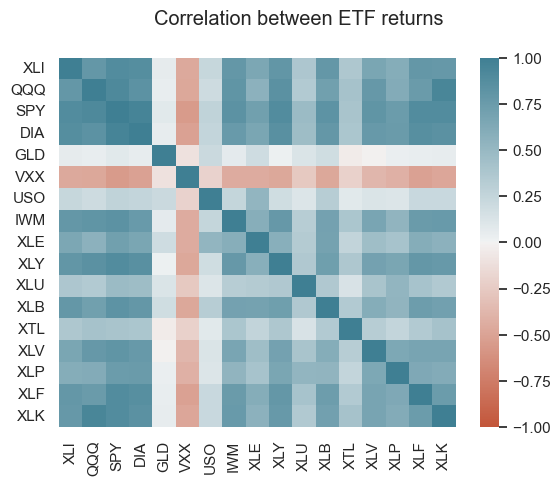

In [17]:
sp500_sym = pd.read_csv(input_path + 'sp500_sectors.csv')
etfs = sp500_px.loc[
    sp500_px.index >= '2012-07-01',
    sp500_sym[sp500_sym['sector']=='etf']['symbol'] # funds belong to ETF
]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.suptitle('Correlation between ETF returns')
plt.show()

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data. The methods in the `scikit-learn` module `sklearn.covariance` implement a variety of robust approaches.

**Other Correlation Estimates**  
- Statisticians long ago proposed other types of correlation coefficients, such as *Spearman’s rho* or *Kendall’s tau*. These are correlation coefficients based on the rank of the data. Since they work with ranks rather than values, these estimates are robust to outliers and can handle certain types of nonlinearities. However, data scientists can generally stick to Pearson’s correlation coefficient, and its robust alternatives, for exploratory analysis. The appeal of rankbased estimates is mostly for smaller data sets and specific hypothesis tests.

### 1.7.1 Scatterplots

The standard way to visualize the relationship between two measured data variables is with a scatterplot. Below plot shows the correlation between the daily returns for ATT and Verizon.

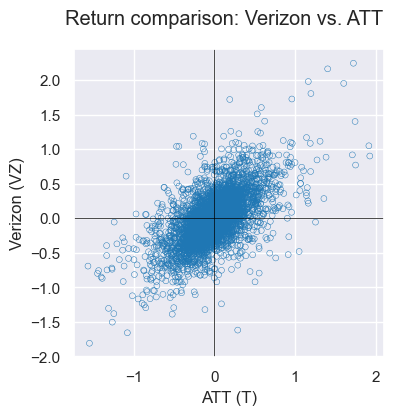

In [18]:
fig = plt.figure(figsize=(4,4))
ax = sns.scatterplot(sp500_px, x='T', y='VZ', edgecolor='tab:blue', 
                     facecolor='none', size=1)
plt.xlabel('ATT (T)')
plt.ylabel('Verizon (VZ)')
plt.axhline(0, color='black', lw=.5)
plt.axvline(0, color='black', lw=.5)
plt.suptitle('Return comparison: Verizon vs. ATT')
ax.get_legend().remove()
plt.show()

## 1.8 Exploring Two or More Variables

#### <p style="text-align: center;">Key Terms for Exploring Two or More Variables</p>

- ***Contingency table***  
A tally of counts between two or more categorical variables.  
<br>
- ***Hexagonal binning***  
A plot of two numeric variables with the records binned into hexagons.  
<br>
- ***Contour plot***  
A plot showing the density of two numeric variables like a topographical map.  
<br>
- ***Violin plot***  
Similar to a boxplot but showing the density estimate.

### 1.8.1 Hexagonal Binning and Contours <br/> (Plotting Numeric Versus Numeric Data)

In last scatter plot (Verizon vs. ATT) the data points are too dense in the center and difficult to visualize the relationship. We can illustrate the distribution by *hexagonal binning* plot and *coutour* plot.

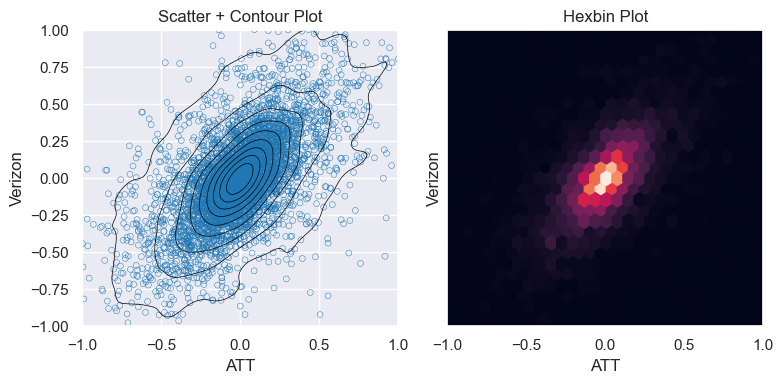

In [19]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
sns.scatterplot(sp500_px, x='T', y='VZ', edgecolor='tab:blue', 
                facecolor='none', size=1, ax=axs[0])
axs[0].get_legend().remove()
axs[1].hexbin(sp500_px['T'], sp500_px['VZ'], gridsize=50)
sns.kdeplot(sp500_px, x='T', y='VZ', color='black', linewidths=.5, ax=axs[0])
plt.xlim(-1,1)
plt.ylim(-1,1)
axs[0].set_title('Scatter + Contour Plot')
axs[1].set_title('Hexbin Plot')
for ax in axs:
    ax.set_xlabel('ATT')
    ax.set_ylabel('Verizon')
fig.tight_layout()
plt.show()

Above plots are more informative on the data relationship than scatter plot only. `seaborn.jointplot` shown in below plot is also a great way to illustrate their relationship.

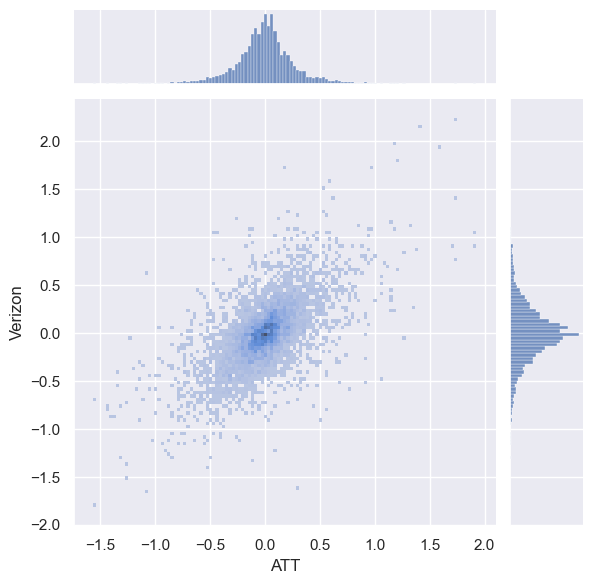

In [20]:
sns.jointplot(sp500_px, x='T', y='VZ', kind='hist')
plt.xlabel('ATT')
plt.ylabel('Verizon')
plt.show()

For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense to show any useful information. To illustrate, consider the data set kc_tax, which contains the tax-assessed values for residential properties in King County, Washington.

In [21]:
kc_tax = pd.read_csv(input_path + 'kc_tax.csv.gz',
                     compression='gzip')

# to focus on the main part of the data
# strip out very expensive and very small or large residences
kc_tax0 = kc_tax[(kc_tax['TaxAssessedValue'] < 750_000) &
                 (kc_tax['SqFtTotLiving'] > 100) &
                 (kc_tax['SqFtTotLiving'] < 3500)]
kc_tax0.shape

(432693, 3)

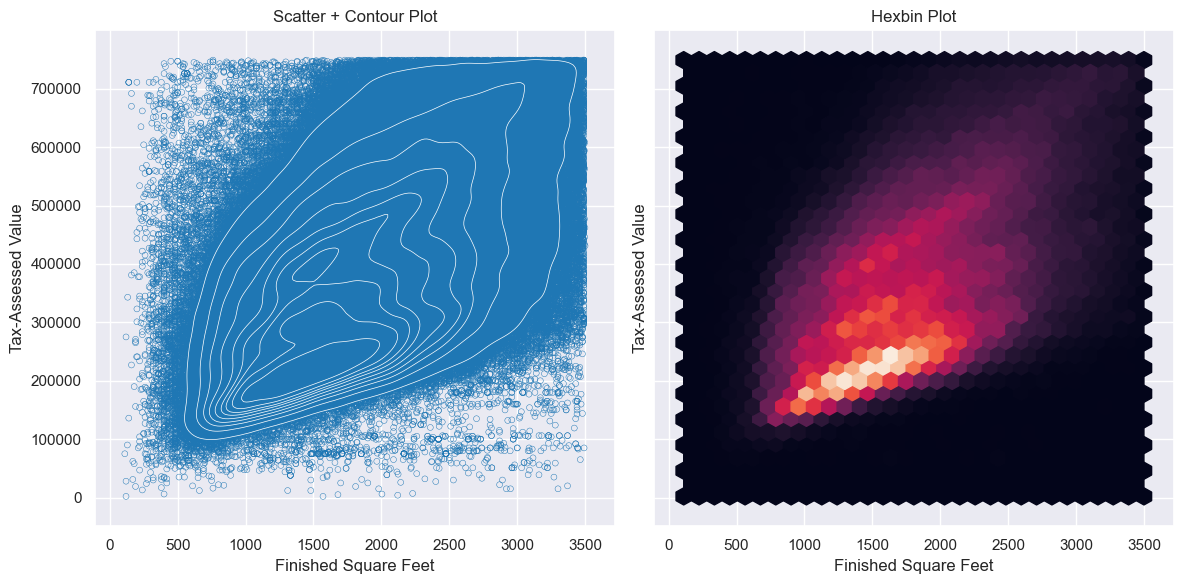

In [22]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
sns.scatterplot(kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', edgecolor='tab:blue', 
                facecolor='none', size=1, ax=axs[0])
axs[0].get_legend().remove()
axs[1].hexbin(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'], gridsize=30)
sns.kdeplot(kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', 
            color='white', linewidths=.5, ax=axs[0])
axs[0].set_title('Scatter + Contour Plot')
axs[1].set_title('Hexbin Plot')
for ax in axs:
    ax.set_xlabel('Finished Square Feet')
    ax.set_ylabel('Tax-Assessed Value')
fig.tight_layout()
plt.show()

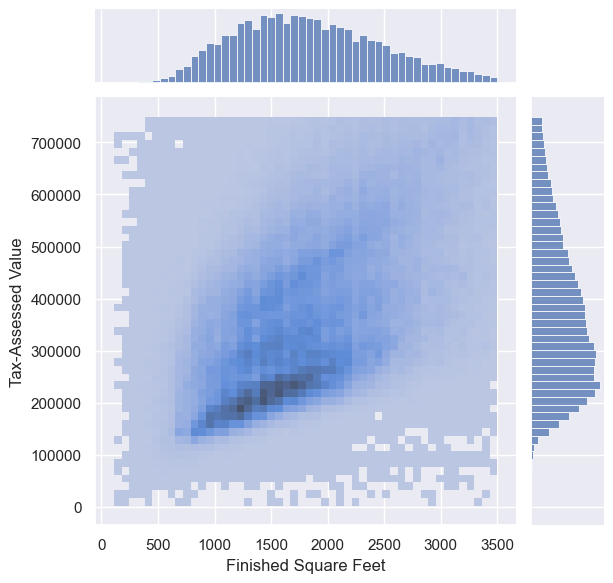

In [23]:
sns.jointplot(kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', 
              kind='hist', joint_kws={'bins':50}, marginal_kws={'bins':50})
plt.xlabel('Finished Square Feet')
plt.ylabel('Tax-Assessed Value')
plt.show()

### 1.8.2 Two Categorical Variables

A useful way to summarize two categorical variables is a contingency table—a table of counts by category. Below shows the contingency table between the grade of a personal loan and the outcome of that loan. This is taken from data provided by Lending Club, a leader in the peer-to-peer lending business.High-grade loans have a very low late/charge-off percentage as compared with lower-grade loans.

In [24]:
lc_loans = pd.read_csv(input_path + 'lc_loans.csv')
crosstab = lc_loans.pivot_table(
    index='grade', columns='status',
    aggfunc=lambda x: len(x),
    margins=True # The margins keyword argument will add the column and row sums.
)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [25]:
df = crosstab.loc['A':'G',:].copy() # ignore the column sums
df.loc[:,'Charged Off':'Late'] = \
    df.loc[:,'Charged Off':'Late']\
        .div(df['All'], axis=0) # divide the rows with the row sum
df['All'] = df['All'] / np.sum(df['All']) # divide the 'All' column by its sum
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### 1.8.3 Categorical and Numeric Data

Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable. A *violin plot* is an enhancement to the boxplot and plots the density estimate with the density on the y-axis.

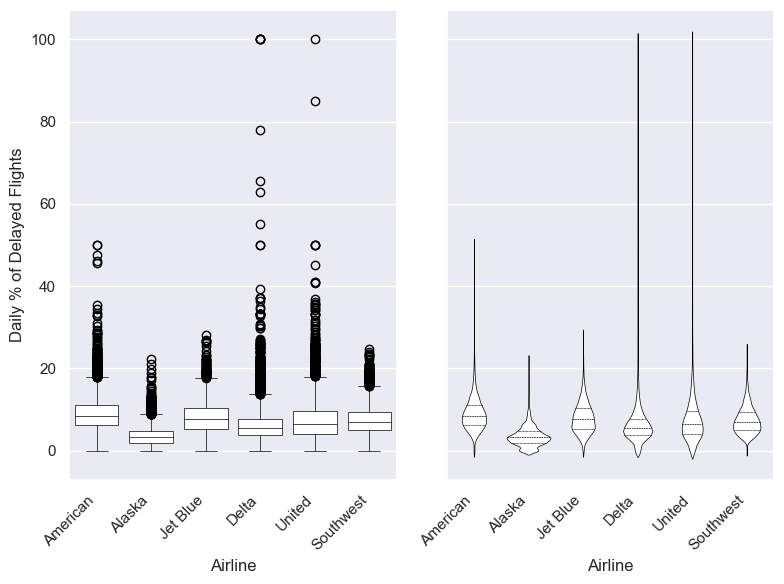

In [26]:
airline_stats = pd.read_csv(input_path + 'airline_stats.csv')

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,6))
sns.boxplot(airline_stats, x='airline', y='pct_carrier_delay', ax=axs[0],
            color='white', linecolor='black', linewidth=0.5)
sns.violinplot(airline_stats, x='airline', y='pct_carrier_delay', ax=axs[1],
               inner='quartile', color='white', 
               linecolor='black', linewidth=0.5)
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Daily % of Delayed Flights')
    ax.set_xlabel('Airline')
fig.tight_layout()
plt.show()

The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.

### 1.8.4 Visualizing Multiple Variables

The types of charts used to compare two variables—scatterplots, hexagonal binning, and boxplots—are readily extended to more variables through the notion of *conditioning*.

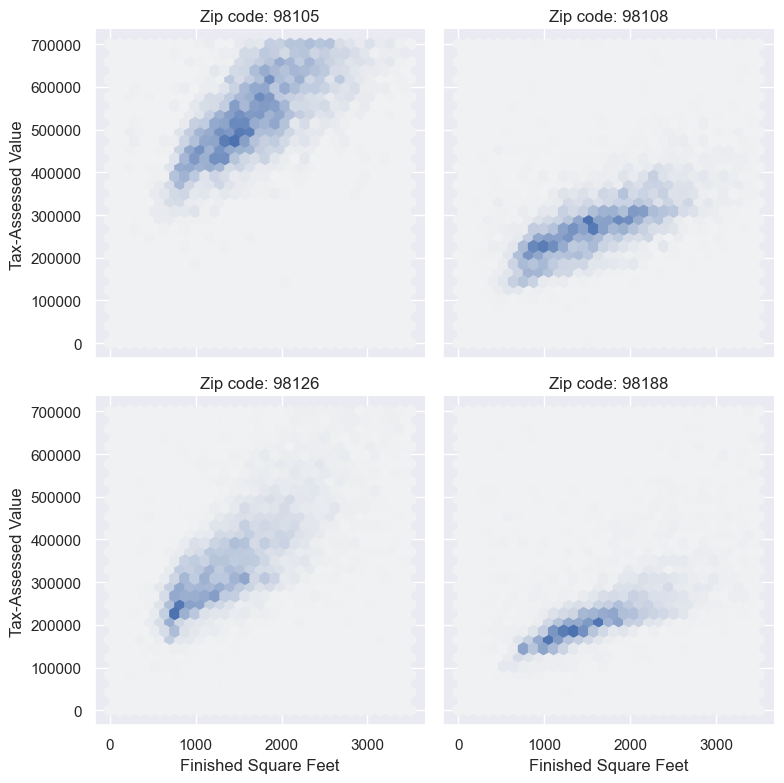

In [27]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0[kc_tax0['ZipCode'].isin(zip_codes)]

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=30, cmap=cmap, **kwargs)

# Use the arguments col and row to specify the conditioning variables. 
# For a single conditioning variable, 
# use col together with col_wrap to wrap the faceted graphs into multiple rows.
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2, 
                  height=4, aspect=1)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700_000]) # define limits of x, y
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code: {col_name:.0f}')
plt.show()

Previously we observed clusters in tax-assessed value vs. homes' finished square feet. Now it is clear that these clusters are the effect of location.